### Additional test for section 1

In [1]:
# packages
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
from scipy import signal, fft

In [117]:
# external function files
import functions, filters_func
import utils
from utils import plot_quantized_all, plot_fourier_three
from functions import signals_ex
from functions import amplitude_sampler

In [3]:
%load_ext autoreload
%autoreload 2

In [125]:
def q_and_smp(f_ct, f_smp, f_wave, duration, gen_func, q, sample, plot, fourier):

    t_ct= functions.time_vector(f_ct, duration)
    t_smp= functions.time_vector(f_smp, duration)

    y_ct = gen_func(t_ct)
    y_smp = gen_func(t_smp)

    y_ct_q = q.quantize(y_ct)
    y_smp_q =  q.quantize(y_smp)

    if plot:
        xlimit = 2/f_wave;
        ylimit= y_ct.max() + 0.5
        plot_quantized_all(t_ct, t_smp, y_ct, y_ct_q, y_smp_q, xlimit, ylimit)

    if fourier:
        f_lim = f_wave*5
        freq_ct, X_ct = utils.fourier_analysis(y_ct, f_wave*100)
        freq_q, X_q = utils.fourier_analysis(y_ct_q, f_wave*100)
        freq_smp_q, X_smp_q = utils.fourier_analysis(q.quantize(y_smp_q), f_wave*100)
        plot_fourier_three(freq_ct, X_ct, freq_q, X_q,  f_lim, freq_smp_q, X_smp_q)

    if sample:
        return y_ct_q, y_smp_q
    elif sample == False:
        return y_ct


### Sin function

In [126]:
def test_sin(x):
    f0 = 1200 # Hz
    return 0.9 * np.sin(2 * np.pi * f0 * x)

In [127]:
q = functions.quantizer(5)
#---------------------
f_wave = 1200; f_ct = 120000; f_smp = 44100
n_periods = 1000;
duration= n_periods*1/f_wave
#-----------------------

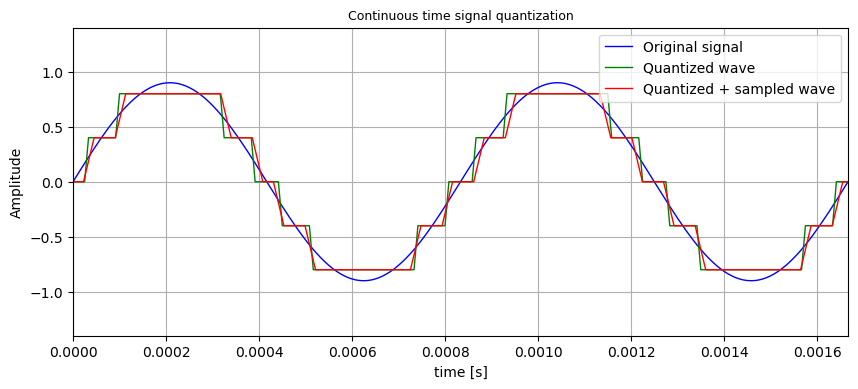

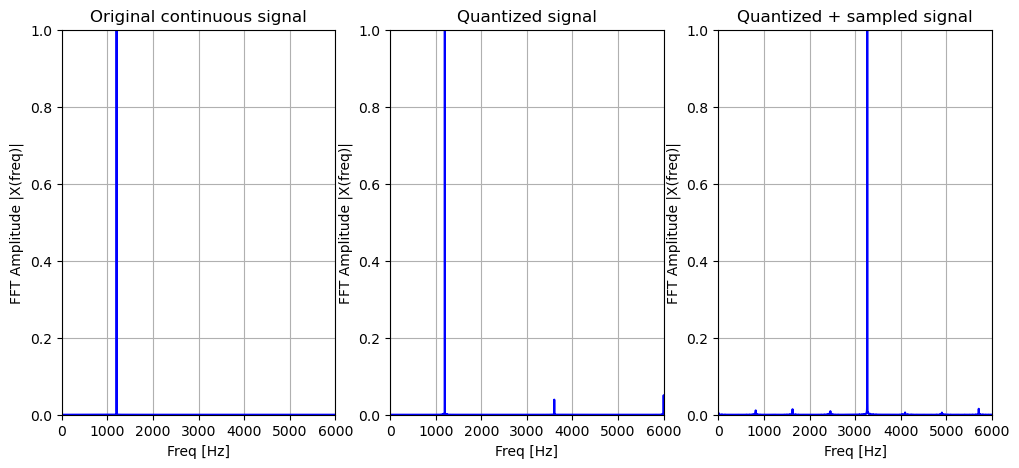

C:\Users\Utente\SP_repos\Semester_Project\utils.py:37: RuntimeWarning: divide by zero encountered in log10
  plt.title(title)


(array([0., 0., 0., ..., 0., 0., 0.]),
 array([ 0. ,  0. ,  0.4, ..., -0.4,  0. ,  0. ]))

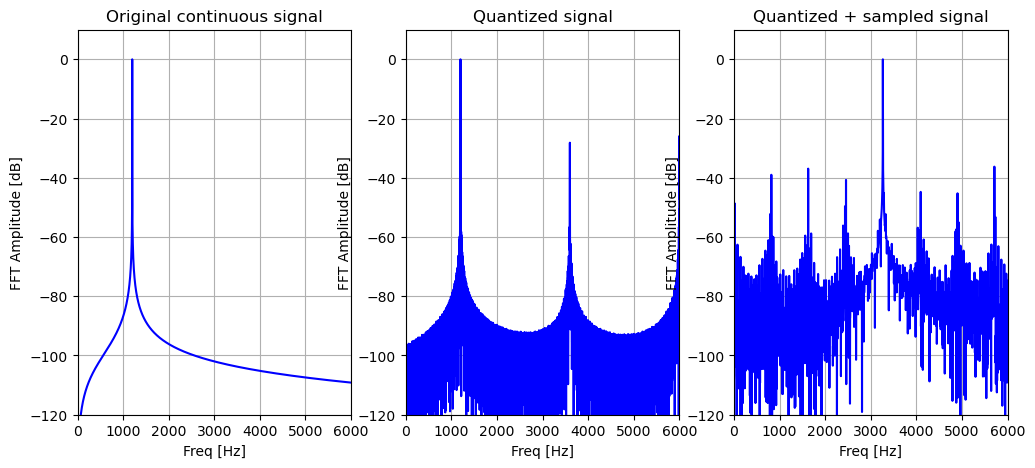

In [128]:
q_and_smp(f_ct = 120000, f_smp = 44100 , f_wave = 1200, duration = 1, gen_func = test_sin, q=q, sample = True, plot = True, fourier= True)


### Cosine function


In [129]:
def test_cos(x):
    f = 5 #Hz
    return 0.7 \
        * np.cos(2 * np.pi * f * x)

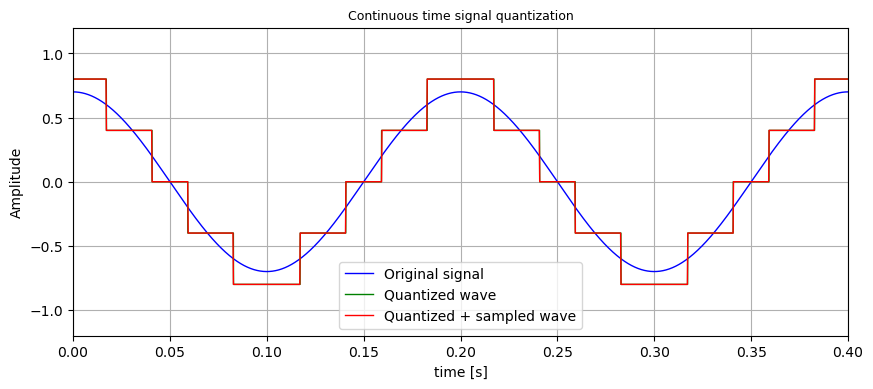

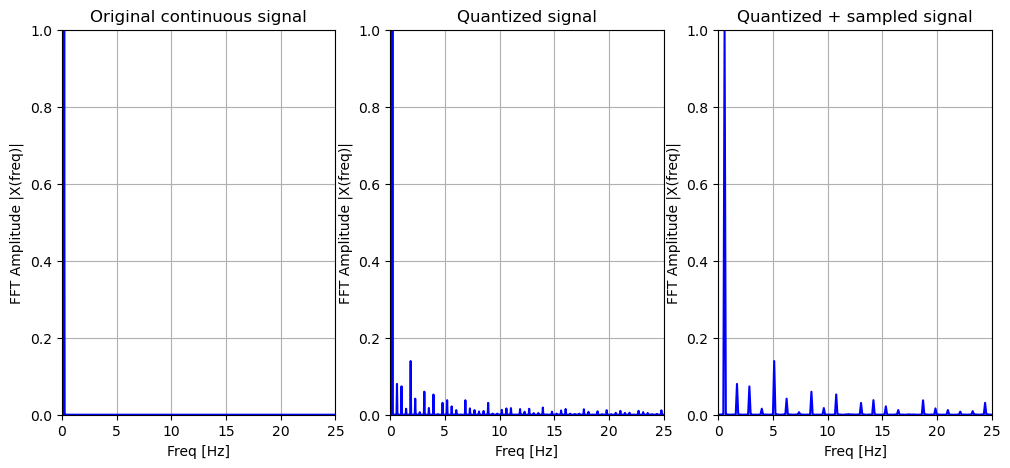

(array([0.8, 0.8, 0.8, ..., 0.8, 0.8, 0.8]),
 array([0.8, 0.8, 0.8, ..., 0.8, 0.8, 0.8]))

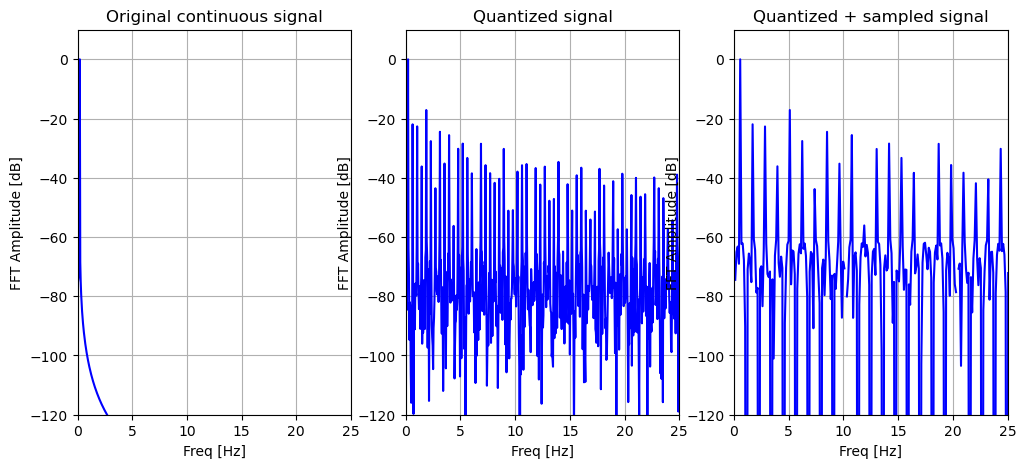

In [130]:
q = functions.quantizer(5)
n_periods = 1000;
f_wave = 5
duration= n_periods*1/f_wave

q_and_smp(f_ct = 12000, f_smp = 4410 , f_wave = 5, duration = 1, gen_func = test_cos, q=q, sample = True, plot = True, fourier= True)


#### Sawtooth signal

In [131]:
def test_sawtooth(x):
    f0 = 20 # Hz
    return 0.8* signal.sawtooth(2 * np.pi * f0 * x, 0.7)

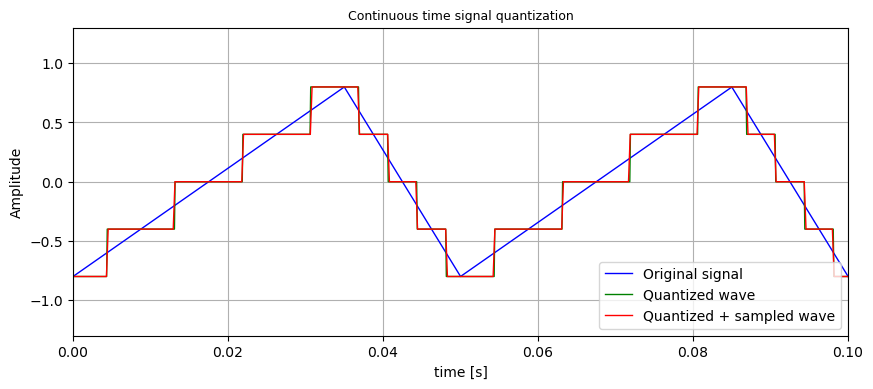

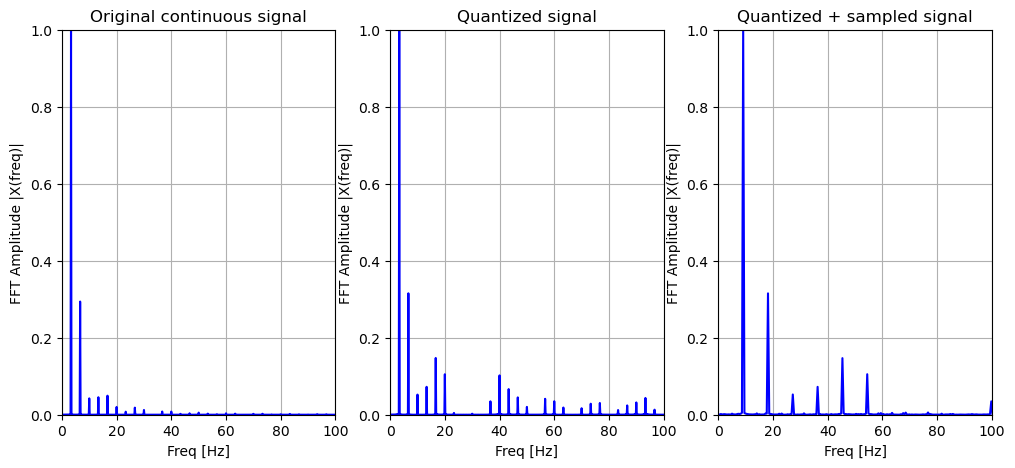

(array([-0.8, -0.8, -0.8, ..., -0.8, -0.8, -0.8]),
 array([-0.8, -0.8, -0.8, ..., -0.8, -0.8, -0.8]))

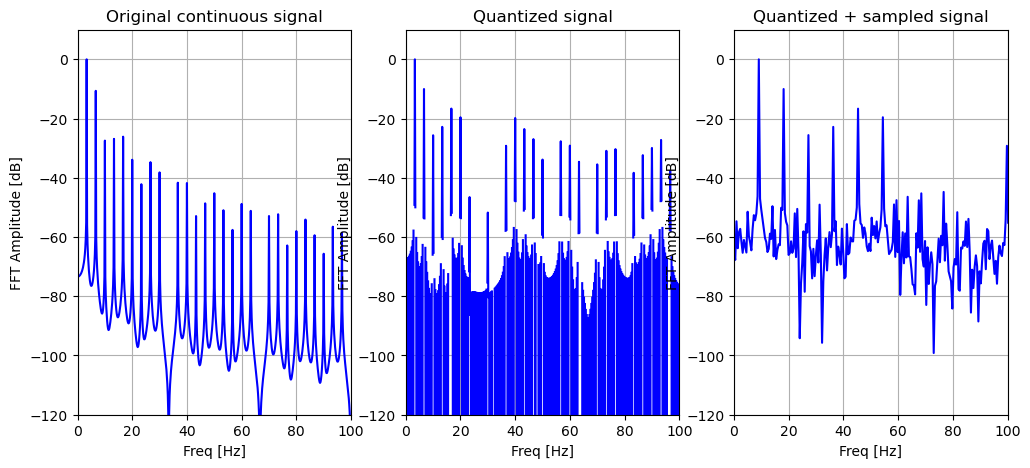

In [132]:
q = functions.quantizer(5)
n_periods = 1000;
f_wave = 5
duration= n_periods*1/f_wave

q_and_smp(f_ct = 12000, f_smp = 4410 , f_wave = 20, duration = 1, gen_func = test_sawtooth, q=q, sample = True, plot = True, fourier= True)

#### Cubic Polynomial

In [60]:
def poly_spline3(x,y):
    spline = CubicSpline(x, y) # Create the cubic spline
    x_range = np.linspace(min(x), max(x), 1000) #spline x range
    y_range = spline(x_range)

    return x_range, y_range

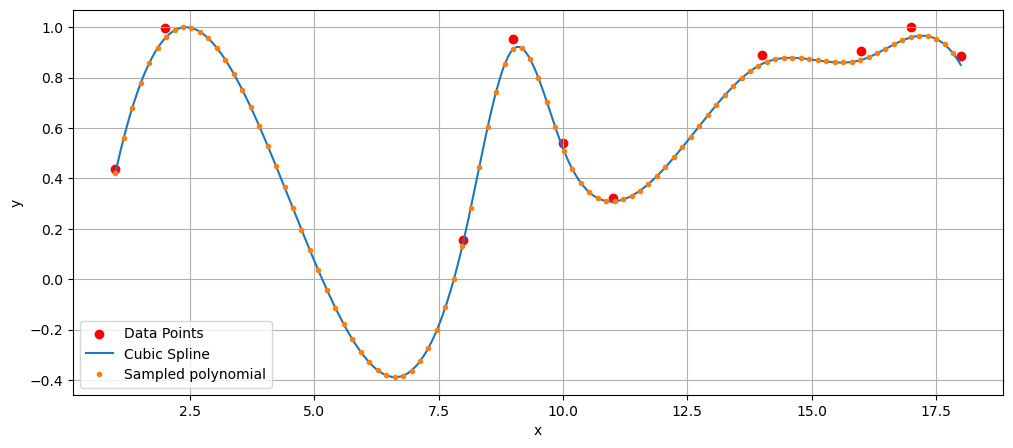

In [181]:
import random
from scipy.interpolate import CubicSpline

# Define the data points
x =  np.sort(random.sample(range(1, 20), 10))
y = np.array([random.random() for _ in range(10)])
x_range, y_range = poly_spline3(x,y)

#Normalize
y_range /= y_range.max()
y /= y.max()

# sample data points
x_smp = x_range[::10]
y_smp = y_range[::10]
y_smp /= y_smp.max() # normalize to [-1,1]
#------------------------------------------------------------
plt.figure(figsize=(12, 5))
plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x_range, y_range, label='Cubic Spline')
plt.plot(x_smp, y_smp, '.',label='Sampled polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

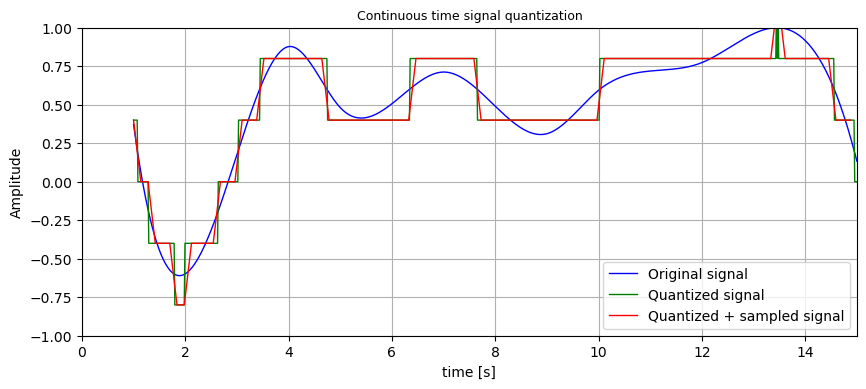

In [136]:
plot_quantized_all(x_range, x_smp, y_range, q.quantize(y_range), q.quantize(y_smp), xlimit = max(x_range), ylimit=1)

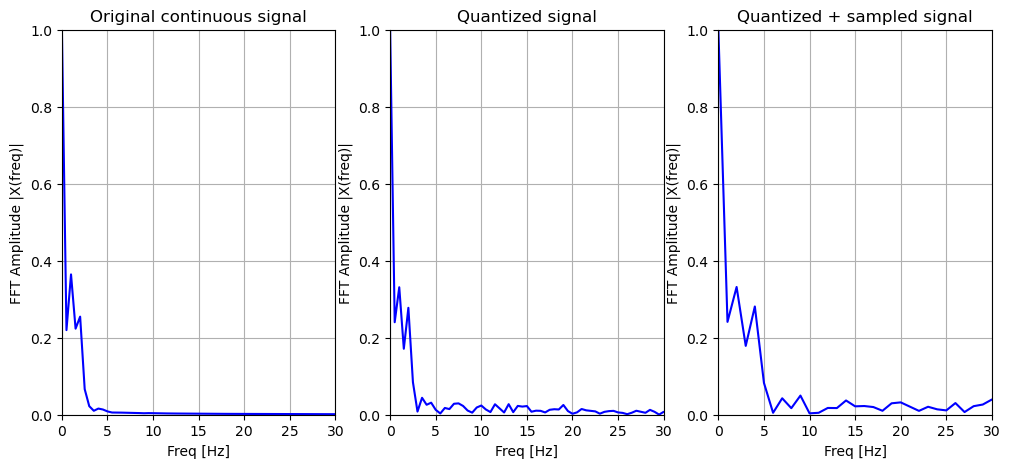

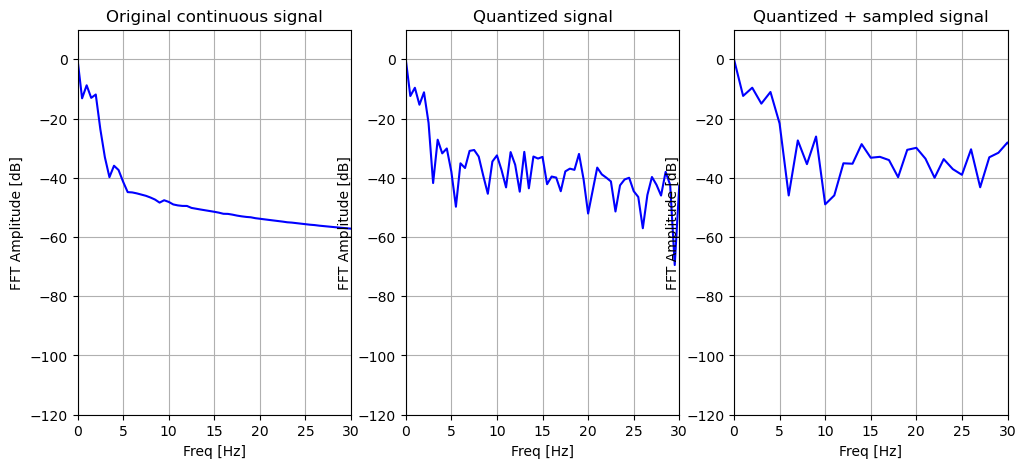

In [152]:
freq_ct, X_ct = utils.fourier_analysis(y_range, fsmp = 500)
freq_q, X_q = utils.fourier_analysis(q.quantize(y_range), fsmp = 500)
freq_q_smp, X_q_smp = utils.fourier_analysis(q.quantize(y_smp), fsmp = 100)

plot_fourier_three(freq_ct, X_ct, freq_q, X_q, 30, freq_q_smp, X_q_smp)

### Compound sinusoid

In [154]:
def test_sin_comp(x,amp,f): #Hz
    return amp * np.sin(2 * np.pi * f * x)

In [155]:
def sinewave(amp,dur,f,fs):
    T= 1/fs; #samplig period
    t= np.linspace(0,dur, int(np.ceil(dur/T)))
    x= amp*np.sin(2*np.pi*f*t)  #continuous time waveform at frequency f
    return t,x

def smp_time(fs, dur):
    T = 1 / fs                   #longer sampling period
    n = np.arange(0, dur / T)    #number of intervals
    nT = n * T
    return nT

In [156]:
f1 = 2; f2 = 4;f3 = 18;
fs_ct_comp=10000;
fs_smp_comp = 1000;

t_comp1, x_comp1 = sinewave(0.3, duration,f1,fs_ct_comp)
t_comp2, x_comp2 = sinewave(0.5, duration,f2,fs_ct_comp)
t_comp3, x_comp3 = sinewave(0.1, duration,f3,fs_ct_comp)

x_ct_comp = x_comp1 + x_comp2 + x_comp3
t_ct_comp = t_comp1;

#Composed sampled time wave at fs = 4330 Hz
t_c_smp = smp_time(fs_smp_comp, duration)

t_c_smp1, x_c_smp1 = sinewave(0.3, duration,f1,fs_smp_comp)
t_c_smp2, x_c_smp2 = sinewave(0.5, duration,f2,fs_smp_comp)
t_c_smp3, x_c_smp3 = sinewave(0.1, duration,f3,fs_smp_comp)

x_smp_comp = x_c_smp1 + x_c_smp2 + x_c_smp3;
t_smp_comp = t_c_smp1;

In [157]:
q = functions.quantizer(5)
x_q_comp = q.quantize(x_ct_comp)
x_q_smp_comp = q.quantize(x_smp_comp)

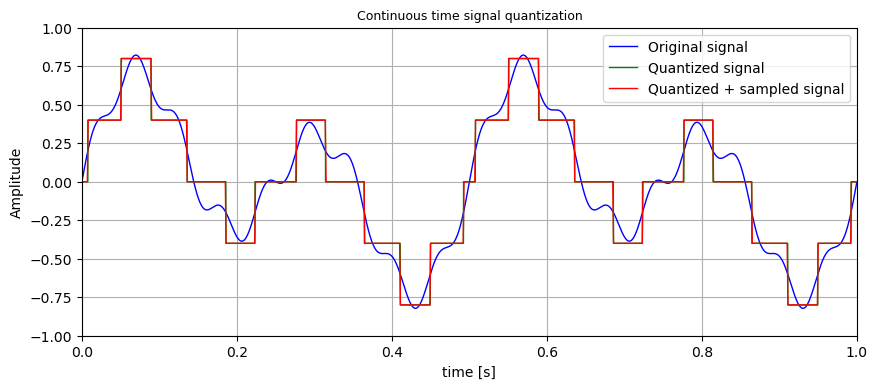

In [159]:
plot_quantized_all(t_ct_comp, t_smp_comp, x_ct_comp, x_q_comp, x_q_smp_comp, 1, 1)

In [160]:
# Fourier analysis
freq_ct, X_ct = utils.fourier_analysis(x_ct_comp, fs_ct_comp)
freq_q, X_q = utils.fourier_analysis(x_q_comp, fs_ct_comp)
freq_q_smp, X_q_smp = utils.fourier_analysis(x_q_smp_comp, fs_smp_comp)

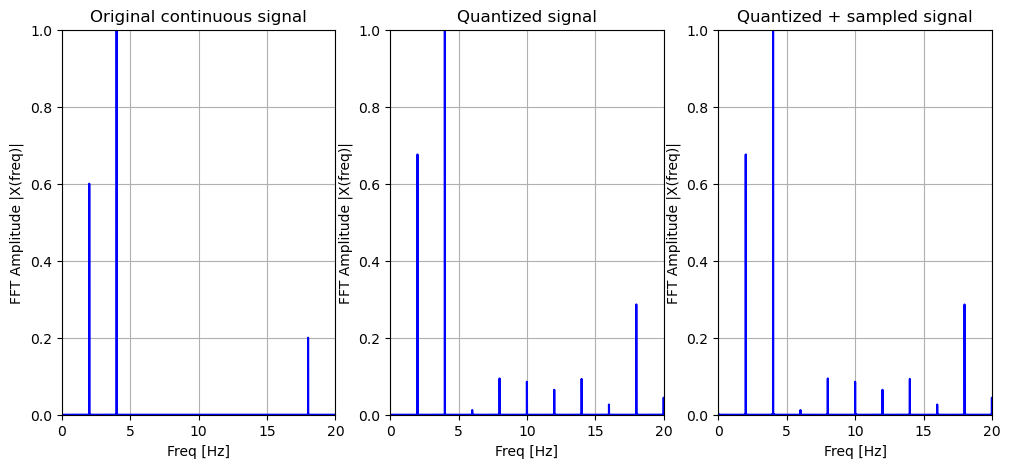

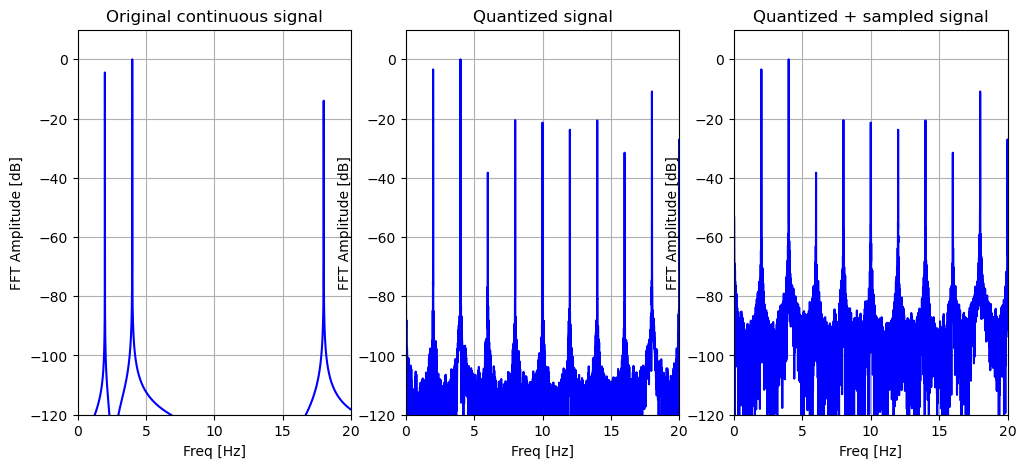

In [161]:
plot_fourier_three(freq_ct, X_ct, freq_q, X_q,  20, freq_q_smp, X_q_smp)